# Error Probabilities of Digital Modulation Schemes

## Table of Contents

* [Digital Transmission over AWGN Channel ](#AWGNchannel)
* [Digital Transmission over Rayleigh-Fading Channel](#Fadingchannel)
* [MAP and ML Detection](#MAP+ML-Detection)
    * [AWGN Channel](#MAP+ML-DetectionAWGN)
    * [Rayleigh Fading Channel](#MAP+ML-DetectionFading)
* [Symbol Error Probabilities](#ErrorProbabilities)
    * [AWGN Channel](#ErrorProbabilitiesAWGN)
    * [Rayleigh Fading Channel](#ErrorProbabilitiesFading)


## Digital Transmission over AWGN Channel <a class="anchor" id="AWGNchannel"></a>

The transmission of digital signals over a simple additive white Gaussian noise (AWGN) channel is modeled by

\begin{equation}
    y = x + n \; .
\end{equation}

In this discrete-time system model, the transmit signal $x \in \mathbb{X}$ is taken from an alphabet $\mathbb{X}$ with cardinality $M=|\mathbb{X}|$. Hence, $m=\log_2(M)$ bits are transmitted per symbol. Usually, PSK (Phase Shift Keying), ASK (Amplitude Shift Keying) or QAM (Quadrature Amplitude Modulation) constellations are considered. The average transmit power is defined to

\begin{equation}
    S = \mathrm{E}\{ |{\mathcal X}|^2 \} = \sum_{x \in \mathbb{X}} \Pr\{ {\mathcal X} = x \} \cdot |x|^2 \; .
\end{equation}

It is important to note that $S$ also represents the received signal power because no channel attenuation is considered in this simple model. The noise $n=n' + j n''$ is Gaussian distributed with mean $\mu_{\mathcal N}=0$ and variance (power) $N = \sigma_{\mathcal N}^2$. It is complex-valued with independent real and imaginary parts and the power is equally split onto both parts, i.e. $\sigma_{{\mathcal N}'}^2=\sigma_{{\mathcal N}''}^2=\sigma_{\mathcal N}^2/2$ holds. 

An important parameter is the signal-to-noise ratio 

\begin{equation}
    \gamma = \frac{S}{N} = \frac{\sigma_{\mathcal X}^2}{\sigma_{\mathcal N}^2}
    = \frac{E_{\mathrm{s}}}{N_0} \; .
\end{equation}

It is defined as the ratio of received signal power $S$ and noise power $N$. Due to its huge dynamic range, it is usually expressed in a logarithmic scale and measured in decibel (dB). 

\begin{equation}
    \gamma_{\mathrm{dB}} = 10 \cdot \log_{10} \left( \gamma \right)
    = 10 \cdot \log_{10} \left( \frac{E_{\mathrm{s}}}{N_0} \right) \; .
\end{equation}


## Digital Transmission over Rayleigh Fading Channel <a class="anchor" id="Fadingchannel"></a>

For frequency-nonselective fading channels, the transmit signal is first attenuated by a fading coefficient $h$. We obtain the discrete-time model

\begin{equation}
    y = h \cdot x + n \; .
\end{equation}

Often, diffuse scattering environments are assumed where signals imping at the receiver coming from all possible directions. The superposition of all these (independent) components results in a complex-valued Gaussian random variable with zero mean and variance $\sigma_{\mathcal H}^2$. Ovbisously, the channel coefficient $h$ influences the signal to noise ratio at the receiver. With the received signal power $|h|^2 S$, the instantaneous signal-to-noise ratio becomes

\begin{equation}
    \gamma(h) = |h|^2 \cdot \frac{S}{N} = |h|^2 \cdot \frac{E_{\mathrm{s}}}{N_0} \; .
\end{equation}

Hence, the SNR is a function of the channel coefficient's squared magnitude. For complex-valued Gaussian channel coefficents $h$, the squared magnitude $|h|^2$ is chi-squared distributed with 2 degrees of freedom, 
while the magnitude $|h|$ is Rayleigh distributed. 

\begin{align}
    p_{|{\mathcal H}|^2}(\xi) &= \frac{1}{\sigma_{\mathcal H}^2} \cdot e^{- \xi / \sigma_{\mathcal H}^2} 
    \quad \text{for} \quad \xi \geq 0 \\
    p_{|{\mathcal H}|}(\xi) &= \frac{2 \xi}{\sigma_{\mathcal H}^2} \cdot e^{- \xi / \sigma_{\mathcal H}^2} 
    \quad \text{for} \quad \xi \geq 0 \; .
\end{align}

Therefore, this fading statistics leads to the name Rayleigh fading. For non-dissipative channels, the average channel energy is normalized to $\sigma_{\mathcal H}^2=1$. The distributions of magnitude and squared magnitude (power) are illustrated in the figure below. Obviously, the SNR becomes a random variable being chi-squared distributed with tow degrees of freedom.


<function matplotlib.pyplot.show(close=None, block=None)>

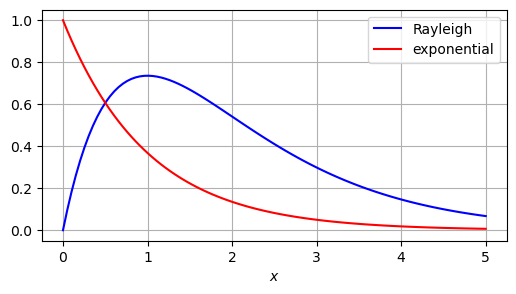

In [6]:
import numpy as np
import matplotlib.pyplot as plt

save_results = False

N_xi = 100
xi_max = 5
xi = np.linspace(0,xi_max,N_xi)

p_H2 = np.exp(-xi)
p_H = 2*xi*np.exp(-xi)

fig_fading = plt.figure(figsize=(6,3))
ax_fading = fig_fading.add_subplot(111)
ax_fading.plot(xi, p_H, 'b-',label='Rayleigh')
ax_fading.plot(xi, p_H2, 'r-',label='exponential')
plt.xlabel('$x$')
plt.grid(True)
plt.legend()
plt.show

## MAP and ML Detection <a class="anchor" id="MAP+ML-Detection"></a>

### AWGN Channel <a class="anchor" id="MAP+ML-DetectionAWGN"></a>

The maximum a posteriori (MAP) detector maximizes the a posteriori probability $\Pr\{ \tilde{x} \mid y \}$ with respect to the hypotheses $x$. 

\begin{equation}
    \hat{x}^{\mathsf{MAP}}
    = \arg \! \max_{\tilde{x} \in \mathbb{X}} \Pr\{ \tilde{x} \mid y \}
    = \arg \! \max_{\tilde{x} \in \mathbb{X}} \Big[ p(y \mid \tilde{x}) \cdot \Pr\{ \tilde{x}\} \Big] 
\end{equation}

The second equality is obtained by applying Bayes rule

\begin{equation}
    \Pr\{ \tilde{x} \mid y \} = p(y \mid \tilde{x}) \cdot \frac{\Pr\{ \tilde{x}\}}{p(y)} \; .
\end{equation}

It holds because the denominator $p(y)$ does not depend on the hypotheses $x$ and can be skipped. We observe that the likelihood function $p(y | \tilde{x})$ as well as the a priori distribution $\Pr\{ \tilde{x}\}$ influence the decision. The MAP detector balances the significance of observation $y$ and a priori knowledge in an optimal way.

If all data symbols occur with equal probability, the term $\Pr\{ \tilde{x}\}$ becomes a constant factor and can be dropped. Then, the MAP detector from above simplifies to the maximum likelihood (ML) detector

\begin{equation}
    \hat{x}^{\mathsf{ML}} = \arg \! \max_{\tilde{x} \in \mathbb{X}} p(y \mid \tilde{x}) \; .
\end{equation}

The likelihood function is the probability density function of $y$ conditioned on the hypothesis $\tilde{x}$ and represents the noise distribution for $\tilde{x}=x$.

For the case of an AWGN channel, the expressions for MAP and ML detection can be further specified. Without loss of generality, the natural logarithm can be applied because it is a monotonically increasing function and its application does  not change the position of the maximum. We obtain the expressions

\begin{align*}
    \hat{x}^{\mathsf{MAP}}
    &= \arg \! \max_{\tilde{x} \in \mathbb{X}} 
        \Big[ \log p(y \mid \tilde{x}) + \log \Pr\{ \tilde{x}\} \Big]
     = \arg \! \max_{\tilde{x} \in \mathbb{X}} 
        \Big[- \frac{|y - \tilde{x}|^2}{\sigma_{\cal N}^2} 
         + \log \Pr\{ \tilde{x}\} \Big] \\
     &= \arg \! \min_{\tilde{x} \in \mathbb{X}} 
        \Big[|y - \tilde{x}|^2 -\sigma_{\cal N}^2 \cdot \log \Pr\{ \tilde{x}\} \Big] \\
    \hat{x}^{\mathsf{ML}} 
    &= \arg \! \max_{\tilde{x} \in \mathbb{X}} \log p(y \mid \tilde{x})
     = \arg \! \min_{\tilde{x} \in \mathbb{X}} |y - \tilde{x}|^2 \; .
\end{align*}

For Gaussian noise, the ML detector looks for that hypothesis $\tilde{x} \in \mathbb{X}$ which has the smallest Euclidean distance to the received symbol $y$. For the MAP detector, this distance is biased by the prior probability $\Pr\{\tilde{x}\}$ of the corresponding hypothesis. For very strong noise (low SNR), the variance $\sigma_{\mathcal N}^2$ is large and the prior dominates the decision because the received value is unreliable. At high SNR (small $\sigma_{\mathcal N}^2$), the received symbol $y$ dominates the decision because it is very trustful in this case and prior information has only little influence.


### Rayleigh Fading Channel <a class="anchor" id="MAP+ML-DetectionFading"></a>

For fading channels with AWGN, the squared Euclidean distance has to be computed by taking the fading coefficient $h$ into account. In practical systems, $h$ has to be estimated at the receiver and is known only approximately. In this notebook, we assume perfect channel knowledge in order to simplify the expressions. In the fading case, we obtain 

\begin{align*}
    \hat{x}^{\mathsf{MAP}}
    &= \arg \! \max_{\tilde{x} \in \mathbb{X}} 
        \Big[ \log p(y \mid h, \tilde{x}) + \log \Pr\{ \tilde{x}\} \Big]
     = \arg \! \max_{\tilde{x} \in \mathbb{X}} 
        \Big[- \frac{|y - h \tilde{x}|^2}{\sigma_{\cal N}^2} 
         + \log \Pr\{ \tilde{x}\} \Big] \\
     &= \arg \! \min_{\tilde{x} \in \mathbb{X}} 
        \Big[|y - h \tilde{x}|^2 -\sigma_{\cal N}^2 \cdot \log \Pr\{ \tilde{x}\} \Big] \\
    \hat{x}^{\mathsf{ML}} 
    &= \arg \! \max_{\tilde{x} \in \mathbb{X}} \log p(y \mid h, \tilde{x})
     = \arg \! \min_{\tilde{x} \in \mathbb{X}} |y - h \tilde{x}|^2 \; .
\end{align*}

Principally, the same interpretation as for pure AWGN channels hold. However, the channel coefficient $h$ influences the reliability of the observation $y$ because it influences the SNR at the receiver.


## Symbol Error Probabilities <a class="anchor" id="ErrorProbabilities"></a>

### AWGN Channel <a class="anchor" id="ErrorProbabilitiesAWGN"></a>

According to the above decision principles, a detection error occors if a wrong symbol $\tilde{x} \not= x$ becomes more probable than the true transmitted symbol $x$. The probability of these events depends on the particlar modulation scheme and the channel properties. Its computation requires the integration of the likelihood function over a certain interval. Unfortunately, the definite integrals over the Gaussian distribution cannot be generally solved in closed form. Instead, the integration needs to be performed numerically. This integration is implemented in almost all mathematical software packages and known and the error function or complimentary error function. They are defined as 

\begin{align*}
    \mathrm{erf}(x) &= \frac{2}{\sqrt{\pi}} \cdot \int_0^x e^{- \xi^2} \ d\xi \\
    \mathrm{erfc}(x) &= 1 - \mathrm{erf}(x)
    = \frac{2}{\sqrt{\pi}} \cdot \int_x^{\infty} e^{- \xi^2} \ d\xi 
\end{align*}

and are depicted in the diagram below.

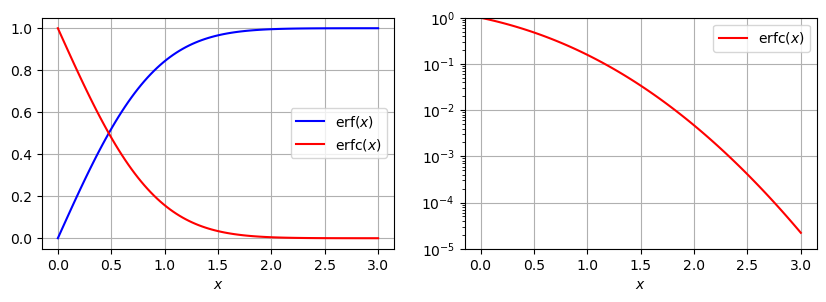

In [8]:
from scipy.special import erf, erfc

x = np.linspace(0,3,101)
ferf = erf(x)
ferfc = erfc(x)

fig2 = plt.figure(figsize=(10,3))
ax1 = fig2.add_subplot(121)
ax1.plot(x, ferf, 'b-',label='$\\mathrm{erf}(x)$')
ax1.plot(x, ferfc, 'r-',label='$\\mathrm{erfc}(x)$')
plt.xlabel('$x$')
plt.grid(True)
plt.legend()

ax2 = fig2.add_subplot(122)
ax2.semilogy(x, ferfc, 'r-',label='$\\mathrm{erfc}(x)$')
plt.xlabel('$x$')
plt.ylim(1e-5,1)
plt.grid(True)
plt.legend()

With these definitions, the error probabilities of linear modulation schemes can be derived. Thereby, the smallest squared Euclidean distance 

\begin{equation}
    \Delta_0^2 = \min_{x,\tilde{x} \in \mathbb{X} \atop x \neq \tilde{x}} \frac{|x - \tilde{x}|^2}{\sigma_{\cal X}^2}
\end{equation}

normalized to the average transmit power plays an important role. The following set of equation summarizes the basic results for ASK, PSK and QAM and simple AWGN transmission.

\begin{align*}
    P_{\mathrm{s}}^{M-\mathsf{ASK}} 
    &= \frac{M-1}{M} \cdot \mathrm{erfc} \left( \sqrt{ \frac{3}{M^2-1} \frac{E_{\mathrm{s}}}{N_0} } \right)
     = \frac{M-1}{M} \cdot \mathrm{erfc} \left( \sqrt{ \left( \frac{\Delta_0}{2} \right)^2 \frac{E_{\mathrm{s}}}{N_0} } \right) \\
    P_{\mathrm{s}}^{M-\mathsf{QAM}} 
    &\approx 2 \frac{\sqrt{M}-1}{\sqrt{M}} \cdot \mathrm{erfc} \left( \sqrt{ \frac{3}{2(M-1)} \frac{E_{\mathrm{s}}}{N_0} } \right) 
    = 2 \frac{\sqrt{M}-1}{\sqrt{M}} \cdot \mathrm{erfc} \left( \sqrt{ \left( \frac{\Delta_0}{2} \right)^2 \frac{E_{\mathrm{s}}}{N_0} } \right) \\
    P_{\mathrm{s}}^{M-\mathsf{PSK}} 
    &\approx \mathrm{erfc} \left( \sqrt{ \sin^2 \left( \frac{\pi}{M} \right) \frac{E_{\mathrm{s}}}{N_0} } \right)
     = \mathrm{erfc} \left( \sqrt{ \left( \frac{\Delta_0}{2} \right)^2 \frac{E_{\mathrm{s}}}{N_0} } \right)
\end{align*}


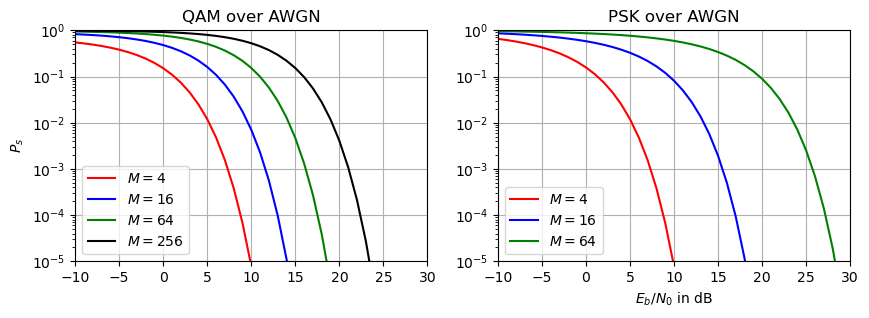

In [13]:
import numpy as np
import matplotlib.pyplot as plt# Bit and Symbol Error Rates for coherent M-PSK and AWGN channel
from scipy import special
#import modulation

# Definition Signal-Noise-Ratio Eb/N0
EbN0dB = np.arange(-10,41)
EbN0 = 10**(EbN0dB/10.0)

# error probabilities of M-QAM over AWGN channels

# 4-QAM (QPSK)
M = 4
m = np.log2(M)
snr = EbN0
QAM4awgn   = special.erfc(np.sqrt(snr))
QAM4awgn_e = QAM4awgn - (0.5 * QAM4awgn)**2
QAM4awgn_Pb = QAM4awgn / 1

# 16-QAM
M = 16
m = np.log2(M)
snr = m * EbN0
QAM16awgn   = 2 * (np.sqrt(M)-1)/np.sqrt(M) * special.erfc(np.sqrt(3/(M-1)/2*snr))
QAM16awgn_e = QAM16awgn - (0.5 * QAM16awgn)**2
QAM16awgn_Pb = QAM16awgn / 2

# 64-QAM
M = 64
m = np.log2(M)
snr = m * EbN0
QAM64awgn   = 2 * (np.sqrt(M)-1)/np.sqrt(M) * special.erfc(np.sqrt(3/(M-1)/2*snr))
QAM64awgn_e = QAM64awgn - (0.5 * QAM64awgn)**2
QAM64awgn_Pb = QAM64awgn / 3

# 256-QAM
M = 256
m = np.log2(M)
snr = m * EbN0
QAM256awgn   = 2 * (np.sqrt(M)-1)/np.sqrt(M) * special.erfc(np.sqrt(3/(M-1)/2*snr))
QAM256awgn_e = QAM256awgn - (0.5 * QAM256awgn)**2
QAM256awgn_Pb = QAM256awgn / 4



# error probabilities of M-PSK over AWGN Channels
# 16-PSK
M = 16
m = np.log2(M)
snr = m * EbN0
# AWGN
PSK16awgn = special.erfc(np.sin(np.pi/M)*np.sqrt(snr))
PSK16awgn_Pb = PSK16awgn / 2

# 64-PSK
M = 64
m = np.log2(M)
snr = m * EbN0
# AWGN
PSK64awgn = special.erfc(np.sin(np.pi/M)*np.sqrt(snr))
PSK64awgn_Pb = PSK64awgn / 4

fig_awgn = plt.figure(figsize=(10,3))
ax3a = fig_awgn.add_subplot(121)
ax3a.semilogy(EbN0dB,QAM4awgn_e,'r-',label='$M=4$')
ax3a.semilogy(EbN0dB,QAM16awgn_e, 'b-', label='$M=16$')
ax3a.semilogy(EbN0dB,QAM64awgn_e,'g-',label='$M=64$')
ax3a.semilogy(EbN0dB,QAM256awgn_e,'k-',label='$M=256$')
plt.grid(True)
plt.legend()
plt.xlim(-10, 30)
plt.ylim(1e-5, 1)
#plt.xlabel('$E_b/N_0$ in dB')
plt.ylabel('$P_s$')
plt.title('QAM over AWGN')


ax3b = fig_awgn.add_subplot(122)
ax3b.semilogy(EbN0dB,QAM4awgn,'r-',label='$M=4$')
ax3b.semilogy(EbN0dB,PSK16awgn,'b-',label='$M=16$')
ax3b.semilogy(EbN0dB,PSK64awgn,'g-',label='$M=64$')
plt.grid(True)
plt.legend()
plt.xlim(-10, 30)
plt.ylim(1e-5, 1)
plt.xlabel('$E_b/N_0$ in dB')
#plt.ylabel('$P_s$')
plt.title('PSK over AWGN')
plt.show()


In [4]:
if save_results:
    erg = EbN0dB.reshape(len(EbN0dB),1)
    erg = np.block([erg,QAM4awgn_Pb.reshape(len(QAM4awgn_Pb),1)])
    erg = np.block([erg,QAM16awgn_Pb.reshape(len(QAM16awgn_Pb),1)])
    erg = np.block([erg,QAM64awgn_Pb.reshape(len(QAM64awgn_Pb),1)])
    erg = np.block([erg,QAM256awgn_Pb.reshape(len(QAM256awgn_Pb),1)])
    erg.shape
    np.savetxt('Results/part2_qam_awgn_ber.txt',erg)

    erg = EbN0dB.reshape(len(EbN0dB),1)
    erg = np.block([erg,QAM4awgn_Pb.reshape(len(QAM4awgn_Pb),1)])
    erg = np.block([erg,PSK16awgn_Pb.reshape(len(PSK16awgn_Pb),1)])
    erg = np.block([erg,PSK64awgn_Pb.reshape(len(PSK64awgn_Pb),1)])
    erg.shape
    np.savetxt('Results/part2_psk_awgn_ber.txt',erg)

The numerical results for QAM and PSK are shown in the figure above. Obviously, the error probability grows with increasing cardinality $M$. Consequently, in order to achieve higher data rates while keeping bandwidth and error probability constant ($\to$ increase $M$), the SNR and, therefore, the transmit power has to be increased. For $M=4$, 4-QAM and QPSK constellations are identical and both modulations schemes have identical performance. For $M>4$, QAM performs much better than PSK. The reason is that QAM constellations have a better arrangement of symbols in the complex plane compared to PSK. Consequently, QAM achieves a larger spacing (larger Euclidean distances) between symbols at the same average transmit power than PSK constellations. 

### Rayleigh Fading Channel <a class="anchor" id="ErrorProbabilitiesFading"></a>

For fading channels, we have to include the channel coefficient $h$ into the above expressions. Since $h$ is a random coefficient, the resulting error probabilities also become stochastic. 

\begin{align*}
    P_{\mathrm{s}}^{M-\mathsf{ASK}}(h) 
    &= \frac{M-1}{M} \cdot \mathrm{erfc} \left( \sqrt{ \left( \frac{\Delta_0}{2} \right)^2 |h|^2 \frac{E_{\mathrm{s}}}{N_0} } \right) \\
    P_{\mathrm{s}}^{M-\mathsf{QAM}}(h) 
    &\approx 2 \frac{\sqrt{M}-1}{\sqrt{M}} \cdot \mathrm{erfc} \left( \sqrt{ \left( \frac{\Delta_0}{2} \right)^2 |h|^2 \frac{E_{\mathrm{s}}}{N_0} } \right) \\
    P_{\mathrm{s}}^{M-\mathsf{PSK}}(h) 
    &\approx \mathrm{erfc} \left( \sqrt{ \left( \frac{\Delta_0}{2} \right)^2 |h|^2 \frac{E_{\mathrm{s}}}{N_0} } \right)
\end{align*}

Therefore, they are usually averaged with respect to the fading statistics and are called ergodic error rates. The expectation with respect to $h$ is quite involved and requires several mathematical tricks to obtain the final solution. Principally, the complex coefficient $h$ is transformed into polar coordinates consisting of magnitude and phase. Next, the integration (expectation) is performed in the spectral domain exploiting the characteristic function of the pdf. This allows the efficient consideration of different fading statistics like Rayleigh or Ricean fading. After a lengthy derivation, the average pairwise error probability for mixing up two symbols with minimum normalized squared Euclidean distance $\Delta_0^2$ becomes

\begin{align*}
    \mathrm{E}_{\mathcal H} \{ P_e(h) \}
    &= \frac{1}{2} \cdot \left( 1 - \sqrt{ \frac{(\Delta_0/2)^2 E_{\mathrm{s}}/N_0}{1 + (\Delta_0/2)^2 E_{\mathrm{s}}/N_0} } \right)
\end{align*}

This intermediate result can now be used to get tight approximations for ASK, QAM and PSK. Incorporating the particular values for $\Delta_0^2$, we obtain

\begin{align*}
    P_{\mathrm{s}}^{M-\mathsf{QAM}}
    &= 2 \frac{\sqrt{M}-1}{\sqrt{M}} \cdot \left(1 - \sqrt{\frac{3 \gamma}{2(M-1)+3 \gamma}} \right) \\
    &\qquad \qquad
        - \frac{(\sqrt{M}-1)^2}{M} \cdot \left( 1 - \frac{4 \gamma}{\pi} \cdot \mathrm{arctan} 
            \left( \frac{1}{\gamma} \right) \right) \\
    &\approx 2 \frac{\sqrt{M}-1}{\sqrt{M}} \cdot \left(1 - \sqrt{\frac{3 \gamma}{2(M-1)+3 \gamma}} \right)  \\
    P_{\mathrm{s}}^{M-\mathsf{PSK}}
     &\approx
     1 - \sqrt{\frac{\sin(\pi/M)^2 \cdot \gamma}{1+\sin(\pi/M)^2 \cdot \gamma}}
\end{align*}

The SNR  is $\gamma = m \frac{E_{\mathrm{b}}}{N_0}$.

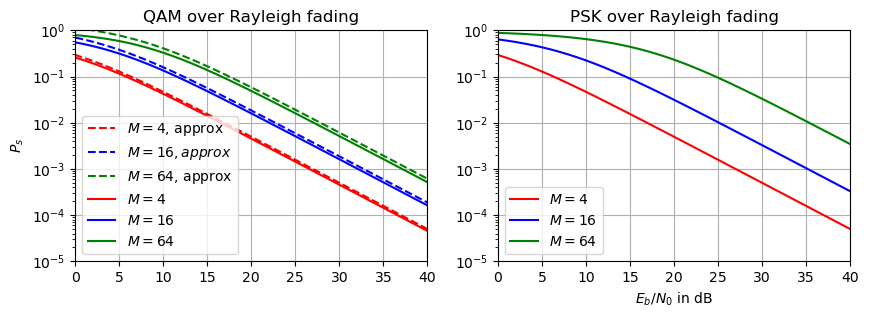

In [15]:
# error probabilities of M-QAM flat Rayleigh fading channels

# 4-QAM (QPSK)
M = 4
m = np.log2(M)
snr = EbN0
gamma    = np.sqrt(snr/(1+snr))
QAM4rayl   = 1 - gamma
QAM4rayl_e = QAM4rayl - 0.25*(1-4/np.pi*gamma*np.arctan(1/gamma))

# 16-QAM
M = 16
m = np.log2(M)
snr = m * EbN0
gamma     = np.sqrt(3*snr/(2*(M-1)+3*snr))
QAM16rayl   = 2 * (np.sqrt(M)-1)/np.sqrt(M) * (1 - gamma)
QAM16rayl_e = QAM16rayl - (np.sqrt(M)-1)**2/M*(1-4/np.pi*gamma*np.arctan(1/gamma))

# 64-QAM
M = 64
m = np.log2(M)
snr = m * EbN0
gamma     = np.sqrt(3*snr/(2*(M-1)+3*snr))
QAM64rayl   = 2 * (np.sqrt(M)-1)/np.sqrt(M) * (1 - gamma)
QAM64rayl_e = QAM64rayl - (np.sqrt(M)-1)**2/M*(1-4/np.pi*gamma*np.arctan(1/gamma))


# error probabilities of M-QAM flat Rayleigh fading channels
# 16-PSK
M = 16
m = np.log2(M)
snr = m * EbN0
h = np.sin(np.pi/M)**2*snr
PSK16rayl_lb = 1 - np.sqrt(h/(1+h))

# 46-PSK
M = 64
m = np.log2(M)
snr = m * EbN0
h = np.sin(np.pi/M)**2*snr
PSK64rayl_lb = 1 - np.sqrt(h/(1+h))


fig_fading = plt.figure(figsize=(10,3))
ax4a = fig_fading.add_subplot(121)
ax4a.semilogy(EbN0dB,QAM4rayl,'r--',label='$M=4$, approx')
ax4a.semilogy(EbN0dB,QAM16rayl, 'b--', label='$M=16, approx$')
ax4a.semilogy(EbN0dB,QAM64rayl,'g--',label='$M=64$, approx')
ax4a.semilogy(EbN0dB,QAM4rayl_e,'r-',label='$M=4$')
ax4a.semilogy(EbN0dB,QAM16rayl_e, 'b-', label='$M=16$')
ax4a.semilogy(EbN0dB,QAM64rayl_e,'g-',label='$M=64$')
plt.grid(True)
plt.legend()
plt.xlim(0, 40)
plt.ylim(1e-5, 1)
#plt.xlabel('$E_b/N_0$ in dB')
plt.ylabel('$P_s$')
plt.title('QAM over Rayleigh fading')

ax4b = fig_fading.add_subplot(122)
ax4b.semilogy(EbN0dB,QAM4rayl,'r-',label='$M=4$')
ax4b.semilogy(EbN0dB,PSK16rayl_lb, 'b-', label='$M=16$')
ax4b.semilogy(EbN0dB,PSK64rayl_lb,'g-',label='$M=64$')
plt.grid(True)
plt.legend()
plt.xlim(0, 40)
plt.ylim(1e-5, 1)
plt.xlabel('$E_b/N_0$ in dB')
#plt.ylabel('$P_s$')
plt.title('PSK over Rayleigh fading')
plt.show()


The figure above shows the corresponsing ergodic error probabilities of QAM and PSK for Rayleigh fading channels. Obviously, the performance degrades significantly compared to a pure AWGN channel. This is known as the fading loss. The reason is that frequently occuring deep fades (small values of $|h|^2$) dominate the overall performance. The error probabilities do not decrease exponentially with the SNR anymore but on at a much smaller rate.

This detrimental effect can be compensated by creating diversity or applying error control coding techniques.